# Daniel Lung's Jupyter Notebook for Assignment 5

**Student:** [Daniel Lung]  
**Dataset:** [Adult Income]  
**Date:** [10/6/25]

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


I decided I wanted to work with the adult finance data. adult.data file does not have any headers, but I found the header names in the adult.names file. I need to define the table headers before loading the data. The data also has missing values at certain points. They represent it with '?' in the dataset.

## 1. Import Data and Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# defining the column names in the order of the data in adult.data
# because it doesn't contain the headers for some reasons...
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
    'income'
]

file_path = "adult.data"

missing_values = "?"

# actually loading the dataset now with the notes above in mind
df = pd.read_csv(
    file_path,
    header=None,
    names=column_names,
    skipinitialspace=True,
    na_values=missing_values
)


## 2. Exploratory Data Analysis

In [33]:
# take a look at our data and see if its loaded correctly
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


Now we know it has 32561 rows and 15 columns. We can see which columns are quantitative vs qualitative. We can also see the some columns (workclass, occupation, and native-country) are missing values. Great. Now we have to decide what to do about the missing data. Since there seems to be not that many missing values, I will just drop all the rows that have missing data.

In [34]:
df = df.dropna()

# Verify the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


We did not lose that many rows, so next lets examine the statistics for the data and see if anything stands out.

In [35]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Capital gain and loss look pretty weird, also, capital gain has a really insanely high standard deviation. Whats going on there?

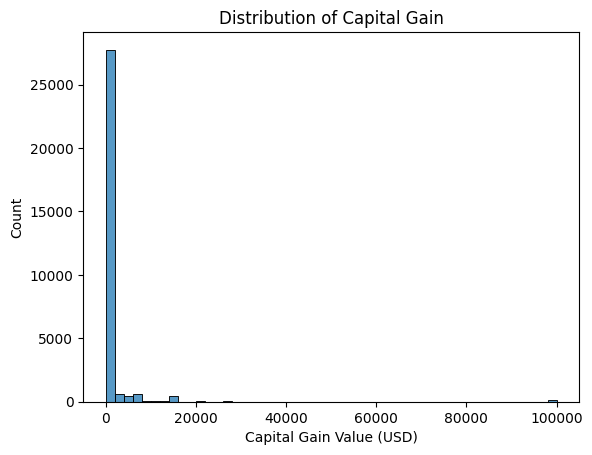

In [36]:
sns.histplot(df['capital-gain'], bins=50, kde=False)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain Value (USD)')
plt.ylabel('Count')
plt.show()

Ok, we can see that this is HEAVILY skewed. Most people have 0 capital gain. That explains the odd values in the summary statistics for capital gains and losses.

Since this dataset is about adult finance, it would be interesting to see if there are certain variables that correlate with higher income. Now lets create some visualizations to see the relationships between our variables or distribution of our data..

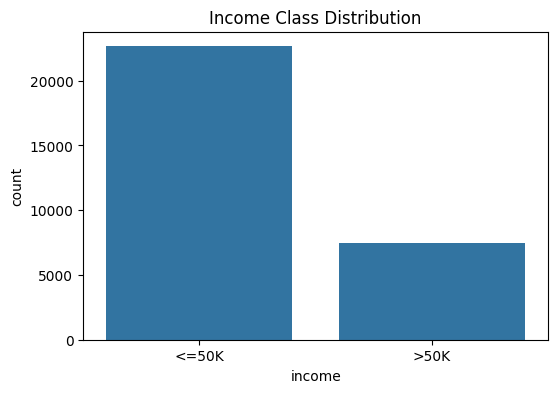

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title('Income Class Distribution')
plt.show()

The dataset is pretty imbalanced, but the numbers make sense. There are probably way more jobs and people working jobs with <50K

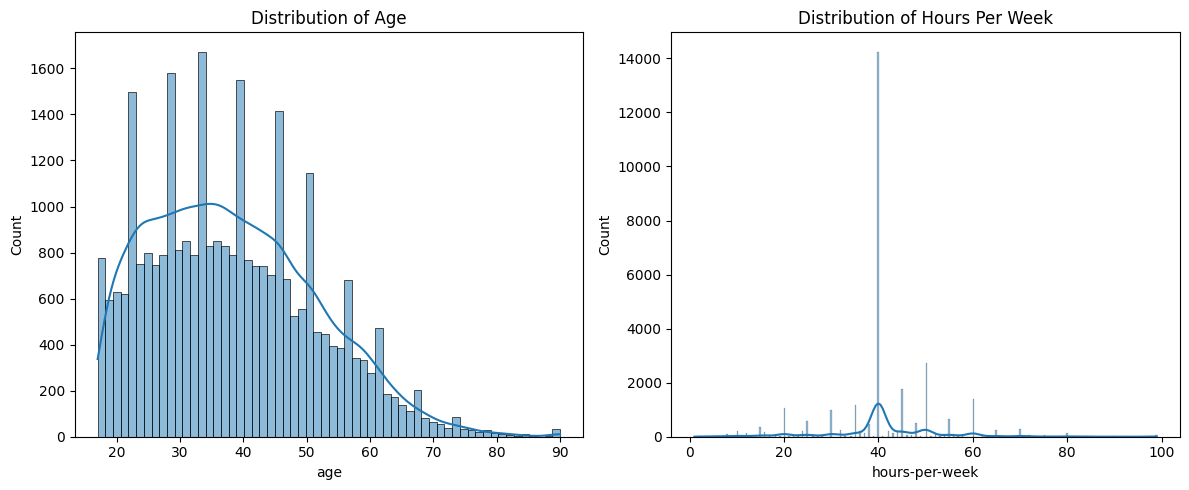

In [38]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.subplot(1, 2, 2)
sns.histplot(df['hours-per-week'], kde=True)
plt.title('Distribution of Hours Per Week')
plt.tight_layout()
plt.show()

The distribution for age is right skewed, most people who are working are in their 20s to 40s. There are much less people that are still working age >60.

To the right is the distribution for hours per week. We can see that the massive spike at 40 hours, which makes a lot of sense. Peaks around 20 hours and 60 hours also make sense for people working part-time / overtime. The outliers are interesting as well, that there are some people who report up to 99 hours per week or as low as 1 hour per week.

I think we should look at the relationship of these variables with income... maybe we can see if we can come up with some hypotheses from that.

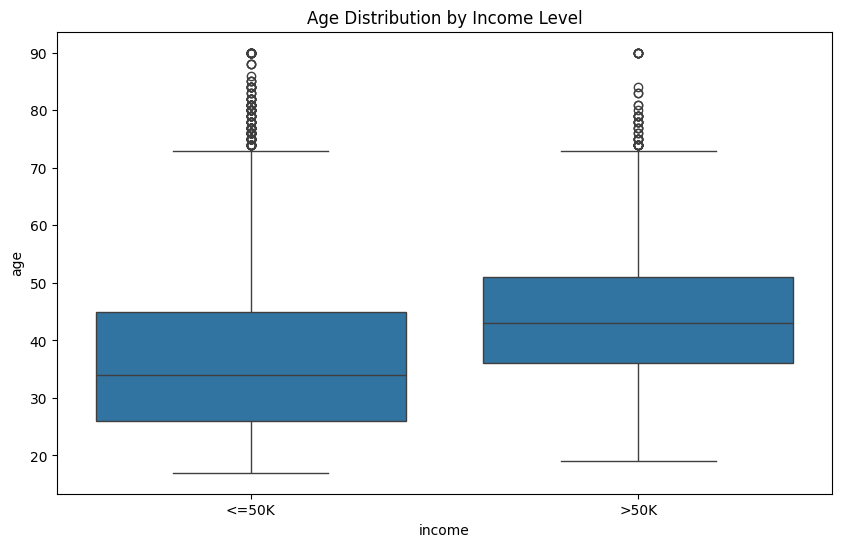

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age Distribution by Income Level')
plt.show()


As we can see in this box and whisker plot, the median age for higher earners is actually higher than lower earners. The fact that the entire box is higher suggests that age is a factor that is assocaited with achieving higher income. This makes sense as more years of experience typically comes with higher salary.

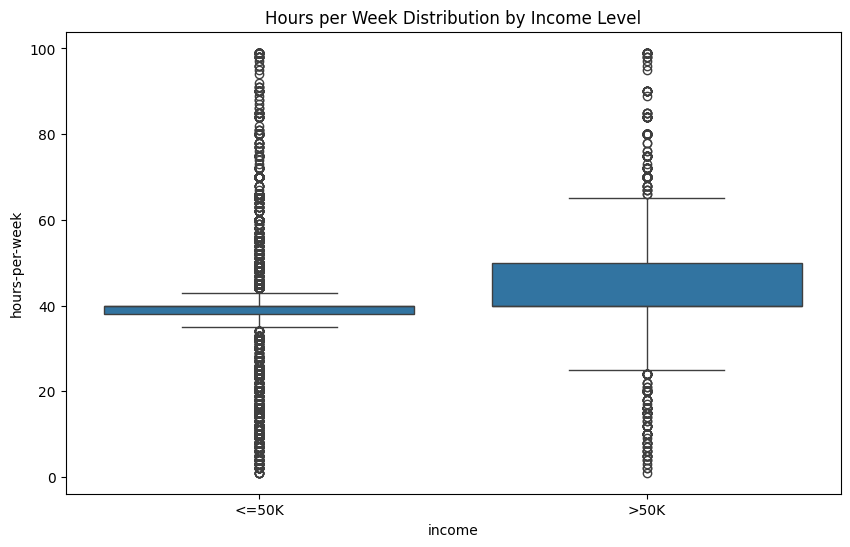

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours per Week Distribution by Income Level')
plt.show()

This funky looking box and whisker plot  allows us to compare the distribution of hours per week by income level. Both groups do show a concentration around the 40 hr per week mark, but the range of the box is actually signficantly higher for the higher earning group, almost entirely above the box of the lower earning group. This shows that high earners are more likely to work hours more than the 40 hr per week standard.

## 3. Formulate Hypotheses

I will come up with 2 hypotheses.

Based on what I learned and visually see from the box and whisker plots, I believe there is a statistical difference when it comes to age and hours per week worked for higher (>50k) and lower (≤50k) earning folks. So, we have to state that in a hypothesis claim.


Hypothesis 1:

H$\mathbf{_0}$: The average age of individuals earning >$50K is the same as those earning ≤50K.

H$\mathbf{_a}$: The average age is significantly higher for individuals earning >$50K.

Hypothesis 2:

H$\mathbf{_0}$: The average hours per week for individuals earning >$50K is the same as those earning ≤50K.

H$\mathbf{_a}$: The average hours per week is significantly higher for individuals earning >$50K.

## 4. Test Your Hypotheses


So we have our hypotheses now, and we have our observations from earlier. I am also going to conduct this test with T-tests. The T-test is the standard inferential statistic used when you want to determine if the means of two groups are statistically different from each other.

We can either statistically back up our claims, or be statistically proven wrong.

In [41]:
# Separate data into two groups based on income
income_over_50k = df[df['income'] == '>50K']
income_under_50k = df[df['income'] == '<=50K']

# Hypothesis 1: Test the difference in mean age
age_ttest_result = ttest_ind(income_over_50k['age'], income_under_50k['age'], equal_var=False)
print(f"T-test for Age and Income: {age_ttest_result}")

# Hypothesis 2: Test the difference in mean hours per week
hours_ttest_result = ttest_ind(income_over_50k['hours-per-week'], income_under_50k['hours-per-week'], equal_var=False)
print(f"T-test for Hours per Week and Income: {hours_ttest_result}")

T-test for Age and Income: TtestResult(statistic=np.float64(49.50465460897567), pvalue=np.float64(0.0), df=np.float64(16700.93148488232))
T-test for Hours per Week and Income: TtestResult(statistic=np.float64(43.20154344380077), pvalue=np.float64(0.0), df=np.float64(14146.788420414314))


For BOTH hypotheses, since the p-value is so low (<0.05), we can reject both the null hyptheses. This means there is statistically significant evidence to support the alternative hypotheses. We have statistically confirmed our observations from our EDA from earlier!


# 5. Summary and Conclusions

Key Findings:
1. The analysis started with 32,561 entries, but after dropping rows we performed our tests with a dataset of 30,162 entries.

2. The dataset is imbalanced for income, the variable we were most interested in, with significantly more people earning ≤$50K than >$50K.

3. The distributions for capital-gain and capital-loss are heavily skewed, with the vast majority of records showing a value of 0

4. The average age is significantly higher for individuals earning >$50K compared to those earning ≤50K.

5. The average hours per week worked is significantly higher for individuals earning >$50K compared to those earning ≤50K.

Now, most would say there isn't much to be learned from this. We kind of know intuitively that older people (more years of experience = more valuable) and more hours worked (more hours x wage) means people can make more money.

Our data is telling us, the people at the top are the people who have invested the most TIME in their careers. Experience, sustained effort and commitment in their careers is how they are able to make more money.

Then, one thing we can take away is that if we spent our time bettering ourselves, improving our skills, and becoming more knowledgable, we can be rewarded with higher salaries :)